# Processing the data supplied by AVISO


The data we use was processed by SSALTO/DUACS and distributed
by AVISO+ https://www.aviso.altimetry.fr with support from CNES.

The sea surface height (SSH) $h(x,y)$ is recorded from satellite altimetry. Under the geostrophic assumption, this yields a two dimensional velocity field on the ocean surface. 

The height field is recorded as a function of spherical coordinates, but in our analysis we focus on smaller regions such that the $f-$ plane assumtion is reasonable. 

We use a single snapshot taken from the Gulf Stream region on 2014 04. 12.


## Loading and processing

The data is in netcdf format. To process it in python, the library ```netCDF4``` is required. 

In [6]:
import netCDF4 as nc
ds = nc.Dataset('data/dt_gulfstream_allsat_phy_l4_20140412_20171127.nc')

The dataframe contains the following variables 

<img src="data/variables.png" width="400px">


The geostrophic velocity's zonal component is denoted by $u(x,y)$ while the meridian component is $v(x,y)$.

$$
\frac{d}{dt}\begin{pmatrix}x \\ y\end{pmatrix} = \begin{pmatrix}u(x,y) \\ v(x,y) \end{pmatrix}
$$

In [28]:
# extract the relevant fields from the netcdf dataframe
US = ds['ugos'][0, :, :]
VS = ds['vgos'][0, :, :]
H = ds['sla'][0, :, :]


lon = ds['longitude']
lat = ds['latitude']

/var/folders/63/3f75hvg57sg3ft1y4q72fj8mrcdrwp/T/ipykernel_14312/633879058.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  US = ds['ugos'][0, :, :]
/var/folders/63/3f75hvg57sg3ft1y4q72fj8mrcdrwp/T/ipykernel_14312/633879058.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  VS = ds['vgos'][0, :, :]
/var/folders/63/3f75hvg57sg3ft1y4q72fj8mrcdrwp

In [15]:
import numpy as np
import matplotlib.pyplot as plt

/var/folders/63/3f75hvg57sg3ft1y4q72fj8mrcdrwp/T/ipykernel_14312/4130025133.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.imshow(US, extent=(lon[0], lon[-1], lat[0], lat[-1]))
/var/folders/63/3f75hvg57sg3ft1y4q72fj8mrcdrwp/T/ipykernel_14312/4130025133.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax2.imshow(VS, extent=(lon[0], lon[

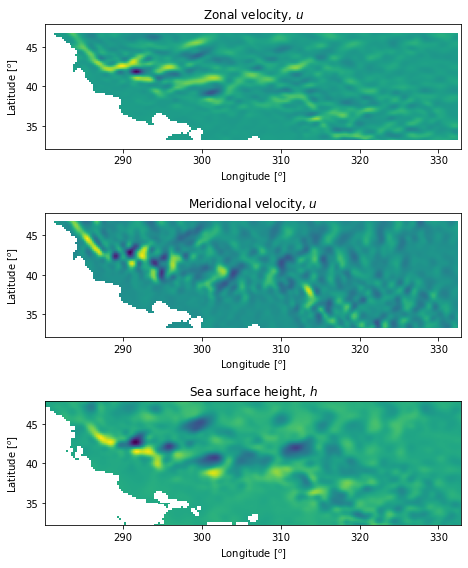

In [27]:
f = plt.figure(figsize = (15,8))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

ax1.imshow(US, extent=(lon[0], lon[-1], lat[0], lat[-1]))
ax1.set_xlabel('Longitude $[^o]$')
ax1.set_ylabel('Latitude $[^o]$')
ax1.set_title('Zonal velocity, $u$')


ax2.imshow(VS, extent=(lon[0], lon[-1], lat[0], lat[-1]))
ax2.set_xlabel('Longitude $[^o]$')
ax2.set_ylabel('Latitude $[^o]$')
ax2.set_title('Meridional velocity, $u$')

ax3.imshow(H, extent=(lon[0], lon[-1], lat[0], lat[-1]))
ax3.set_xlabel('Longitude $[^o]$')
ax3.set_ylabel('Latitude $[^o]$')
ax3.set_title('Sea surface height, $h$')
plt.tight_layout()

### Save the data to text files

In [37]:
# save lon, lat coordinates
np.savetxt('data/lon.dat', lon)
np.savetxt('data/lat.dat', lat)

In [38]:
# save SSH and the velocities
np.savetxt('data/SSH.dat', H)
np.savetxt('data/Us.dat', US)
np.savetxt('data/Vs.dat', VS)